# Step-1 Objective framing from bussiness problem

Objective:

1.Detailed univariate and bivariate analysis with proper observations.

2.Identify some research questions and perform hypothesis testing to test your hypothesis.

Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data Visualization
import seaborn as sns # data Visualization
from scipy.stats import skew
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from dateutil import parser
from bokeh.plotting import figure, output_notebook, show
from bokeh.resources import INLINE
from bokeh.models import HoverTool,ColumnDataSource


## DATA FEATURES

This data features contain overview of the dataset that is load for the analysis

In [2]:
pubg_data= pd.read_csv("data.csv")
pubg_data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [3]:
pubg_data.tail()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,609836,9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,...,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


In [4]:
pubg_data.shape #Shape of the data

(1111742, 30)

In [5]:
pubg_data.info() #information regarding the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [8]:
#df.isnull().sum()
missing_data=pd.DataFrame({'total_missing': pubg_data.isnull().sum(), 'perc_missing': (pubg_data.isnull().sum()/1111742)*100})
missing_data

,total_missing,perc_missing
Unnamed: 0,0,0.0
Id,0,0.0
groupId,0,0.0
matchId,0,0.0
assists,0,0.0
boosts,0,0.0
damageDealt,0,0.0
DBNOs,0,0.0
headshotKills,0,0.0
heals,0,0.0


There are 0.004528% data are missing in the variables. 

There are many ways to treat these missing values. 

Drop
Impute
We can either drop the rows where missing values are present or replace the missing values with some values like mean, median or mode.

Since the % of the data missing is very less, we can remove those rows from the dataset.

The above Columns has missing value present in the data

In [9]:
pubg_data.dropna(inplace = True)

# Let us check if any variables have any missing values
pubg_data.isna().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

By default, the drop function will drop the complete row if any of the variables has missing values. 

After dropping the missing values, now the count of missing values is 0. That means there are no missing values present in the dataset.

In [10]:
pubg_data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

Since we have columns that are unecessary we are droping those columns for better data analysis

In [11]:
pubg=pubg_data.drop(['groupId','matchId','assists','boosts','swimDistance',"vehicleDestroys",'rideDistance','heals',"walkDistance"], axis = 1)

In [12]:
pubg.info() #information regarding the cleaned data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111741 entries, 0 to 1111741
Data columns (total 21 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111741 non-null  int64  
 1   Id               1111741 non-null  object 
 2   damageDealt      1111741 non-null  float64
 3   DBNOs            1111741 non-null  int64  
 4   headshotKills    1111741 non-null  int64  
 5   killPlace        1111741 non-null  int64  
 6   killPoints       1111741 non-null  int64  
 7   kills            1111741 non-null  int64  
 8   killStreaks      1111741 non-null  int64  
 9   longestKill      1111741 non-null  float64
 10  matchDuration    1111741 non-null  int64  
 11  matchType        1111741 non-null  object 
 12  maxPlace         1111741 non-null  int64  
 13  numGroups        1111741 non-null  int64  
 14  rankPoints       1111741 non-null  int64  
 15  revives          1111741 non-null  int64  
 16  roadKills        1

<AxesSubplot:>

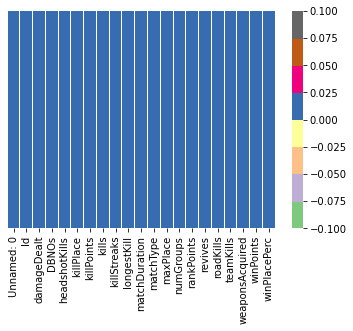

In [13]:
sns.heatmap(pubg.isnull(),yticklabels=False,cbar=True,cmap='Accent')

## Statistical Summary

Now, let’s find out the statistical summary or 5-point summary of the dataset. The 5-point summary tells the descriptive summary which includes mean, median, mode, no. of rows, maximum value, and minimum value for each variable.

In [14]:
pubg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1111741.0,2.224361e+06,1.283879e+06,6.0,1112440.0,2.223770e+06,3.337955e+06,4446964.0
damageDealt,1111741.0,1.307365e+02,1.711756e+02,0.0,0.0,8.411000e+01,1.859000e+02,5990.0
DBNOs,1111741.0,6.573617e-01,1.146023e+00,0.0,0.0,0.000000e+00,1.000000e+00,35.0
headshotKills,1111741.0,2.266490e-01,6.033359e-01,0.0,0.0,0.000000e+00,0.000000e+00,64.0
killPlace,1111741.0,4.759566e+01,2.747022e+01,1.0,24.0,4.700000e+01,7.100000e+01,100.0
killPoints,1111741.0,5.044306e+02,6.274007e+02,0.0,0.0,0.000000e+00,1.171000e+03,2170.0
kills,1111741.0,9.255105e-01,1.562216e+00,0.0,0.0,0.000000e+00,1.000000e+00,72.0
killStreaks,1111741.0,5.448508e-01,7.129033e-01,0.0,0.0,0.000000e+00,1.000000e+00,20.0
longestKill,1111741.0,2.299816e+01,5.106979e+01,0.0,0.0,0.000000e+00,2.133000e+01,1040.0
matchDuration,1111741.0,1.579349e+03,2.589306e+02,133.0,1367.0,1.438000e+03,1.851000e+03,2237.0


In [15]:
pubg.var()

Unnamed: 0         1.648346e+12
damageDealt        2.930108e+04
DBNOs              1.313370e+00
headshotKills      3.640142e-01
killPlace          7.546132e+02
killPoints         3.936317e+05
kills              2.440519e+00
killStreaks        5.082311e-01
longestKill        2.608123e+03
matchDuration      6.704506e+04
maxPlace           5.673859e+02
numGroups          5.418835e+02
rankPoints         5.426450e+05
revives            2.212941e-01
roadKills          5.454495e-03
teamKills          2.818739e-02
weaponsAcquired    6.060476e+00
winPoints          5.468811e+05
winPlacePerc       9.448071e-02
dtype: float64

In [ ]:
print('Highest kills:',pubg['kills'].max(),'Kills')
print('Highest rankPoints:',pubg['rankPoints'].max(),'Points')
print('Lowest rankPoints:',pubg['rankPoints'].mean(),'Points')
print('Mean of Number of groups:',pubg['numGroups'].mean(),'%')
print('Highest headshotKills:',pubg['headshotKills'].max(),'headshotKills')



Skeweness

1.Skewness &> 0 - Right skewed distribution - most values are concentrated on left of the mean, with extreme values to the right.

2.Skewness < 0 - Left skewed distribution - most values are concentrated on the right of the mean, with extreme values to the left.

3.Skewness = 0 - mean = median, the distribution is symmetrical around the mean.


In [17]:
print("Skeweness of headshotKills : %f" % pubg['headshotKills'].skew())
print("Skeweness of winPoints : %f" % pubg['winPoints'].skew())
print("Skeweness of winPlacePerc : %f" % pubg['winPlacePerc'].skew())

Skeweness of headshotKills : 6.048762
Skeweness of winPoints : 0.407400
Skeweness of winPlacePerc : 0.098283


In [18]:
pubg.groupby(['kills','headshotKills','winPoints','winPlacePerc']).count()

Unnamed: 0     Id  damageDealt  \
kills headshotKills winPoints winPlacePerc                                   
0     0             0         0.0000             30830  30830        30830   
                              0.0101                10     10           10   
                              0.0102                67     67           67   
                              0.0103               111    111          111   
                              0.0104               184    184          184   
...                                                ...    ...          ...   
50    42            1500      1.0000                 1      1            1   
53    8             0         1.0000                 1      1            1   
55    7             0         1.0000                 1      1            1   
56    13            0         0.9000                 1      1            1   
72    64            0         1.0000                 1      1            1   

                                            DBNOs  killPlace  killPoints  \
kills headshotKills winPoints winPlacePerc                                 
0     0             0         0.0000        30830      30830       30830   
                              0.0101           10         10          10   
                              0.0102           67         67          67   
                              0.0103          111        111         111   
                              0.0104          184        184         184   
...                                           ...        ...         ...   
50    42            1500      1.0000            1          1           1   
53    8             0         1.0000            1          1           1   
55    7             0         1.0000            1          1           1   
56    13            0         0.9000            1          1           1   
72    64            0         1.0000            1          1           1   

                                            killStreaks  longestKill  \
kills headshotKills winPoints winPlacePerc                             
0     0             0         0.0000              30830        30830   
                              0.0101                 10           10   
                              0.0102                 67           67   
                              0.0103                111          111   
                              0.0104                184          184   
...                                                 ...          ...   
50    42            1500      1.0000                  1            1   
53    8             0         1.0000                  1            1   
55    7             0         1.0000                  1            1   
56    13            0         0.9000                  1            1   
72    64            0         1.0000                  1            1   

                                            matchDuration  matchType  \
kills headshotKills winPoints winPlacePerc                             
0     0             0         0.0000                30830      30830   
                              0.0101                   10         10   
                              0.0102                   67         67   
                              0.0103                  111        111   
                              0.0104                  184        184   
...                                                   ...        ...   
50    42            1500      1.0000                    1          1   
53    8             0         1.0000                    1          1   
55    7             0         1.0000                    1          1   
56    13            0         0.9000                    1          1   
72    64            0         1.0000                    1          1   

                                            maxPlace  numGroups  rankPoints  \
kills headshotKills winPoints winPlacePerc                                    
0     0 

## Cross Tab
Cross Tab shows the relation between the Variables

In [19]:
plt.figure(figsize=(14,12))
pd.crosstab(pubg['kills'], pubg['winPlacePerc'])

winPlacePerc,0.0000,0.0101,0.0102,0.0103,0.0104,0.0105,0.0106,0.0107,0.0109,0.0110,...,0.9890,0.9891,0.9892,0.9894,0.9895,0.9896,0.9897,0.9898,0.9899,1.0000
kills,,,,,,,,,,,,,,,,,,,,,
0,50758,32,144,244,325,284,265,172,146,83,...,6,5,4,10,17,15,8,7,0,4197
1,3815,1,5,3,10,14,4,7,5,6,...,5,11,20,32,24,32,32,21,3,4578
2,538,0,0,0,0,0,0,0,0,0,...,13,17,22,47,50,55,33,19,3,4825
3,110,0,0,0,0,0,0,0,0,0,...,15,30,33,51,47,55,37,23,8,4311
4,34,0,0,0,0,0,0,0,0,0,...,19,20,27,34,47,44,23,24,2,3851
5,29,0,0,0,0,0,0,0,0,0,...,8,17,20,23,34,42,23,19,8,2933
6,23,0,0,0,0,0,0,0,0,0,...,5,20,13,23,22,22,22,7,3,2206
7,10,0,0,0,0,0,0,0,0,0,...,4,12,14,15,22,10,12,12,1,1571
8,12,0,0,0,0,0,0,0,0,0,...,3,3,3,4,10,7,6,5,0,1061


<Figure size 1008x864 with 0 Axes>

## Univariate Analysis

## Barplot

The bar graph is very convenient while comparing categories of data or different groups of data. It helps to track changes over time. It is best for visualizing discrete data.

In [ ]:
plt.rcParams["figure.figsize"]=15,6

#plt.figure(figsize=(15,8))
pubg.plot(x="winPlacePerc", y=["winPoints"], kind="bar");
plt.show()

The above graph is drawn between WinPoints and Win Percentage

## Histogram


Histograms are similar to bar charts and display the same categorical variables against the category of data. Histograms display these categories as bins which indicate the number of data points in a range. It is best for visualizing continuous data.

In [ ]:
plt.figure(dpi = 100, figsize=(15,4))
plt.hist(pubg.revives, edgecolor = 'w')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



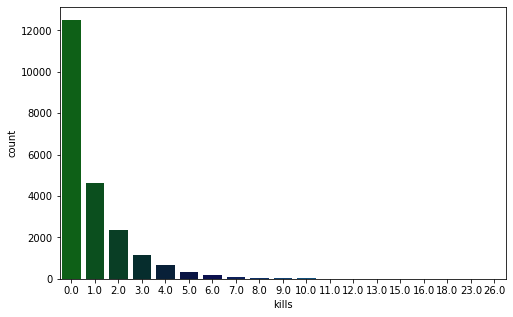

In [116]:
plt.figure(figsize=(8,5))
sns.countplot('kills',data=pubg,palette='ocean')

The above data indicates count of kills by a player maximum number of players has *0 kills*

In [ ]:
sns.countplot(x='headshots', data=pubg);

## Displot

This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.

In [ ]:
Col_names = ['headshotKills','winPoints', 'winPlacePerc', 'killPoints', 'kills', 'killStreaks']

fig, ax = plt.subplots(len(Col_names), figsize=(16,12))

for i, Col_names in enumerate(Col_names):

    sns.distplot(pubg[Col_names], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+Col_names, fontsize=10)
    ax[i].set_xlabel(Col_names, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [ ]:
pubg.plot(x ='kills', kind = 'bar')
plt.show()

In [ ]:
sns.distplot(pubg.winPlacePerc)

## KDE PLOT

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [ ]:
plt.rcParams["figure.figsize"]=15,6

#plt.figure(figsize=(15,8))
pubg.plot(x="kills", y=["headshotKills"], kind="kde");
plt.show()

It is a Bi modal graph and Postively skew with kurtosis

## Bivariate Analysis


Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables. There are three types of bivariate analysis.

Scatter Plot

In [ ]:
fig = px.scatter(pubg, x="kills", y="headshotKills")
fig['layout'].update(title={"text" : 'kills vs headshotKills','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

## Linear Correlation



Linear Correlation represents the strength of a linear relationship between two numerical variables. If there is no correlation between the two variables, there is no tendency to change along with the values of the second quantity.

In [ ]:
coorelation=pubg.corr(method="spearman")
coorelation

In [ ]:
correlation = df.corr()['winPlacePerc'].abs().sort_values(ascending = False)
correlation

## Correlation Plot


Correlation is calculated to find out the intensity of the relationship between 2 variables. Correlation ranges from -1 to 1. -1 correlation value suggests the strong negative relationship and 1 shows a strong positive relationship. 0 means there is no relation between 2 variables.

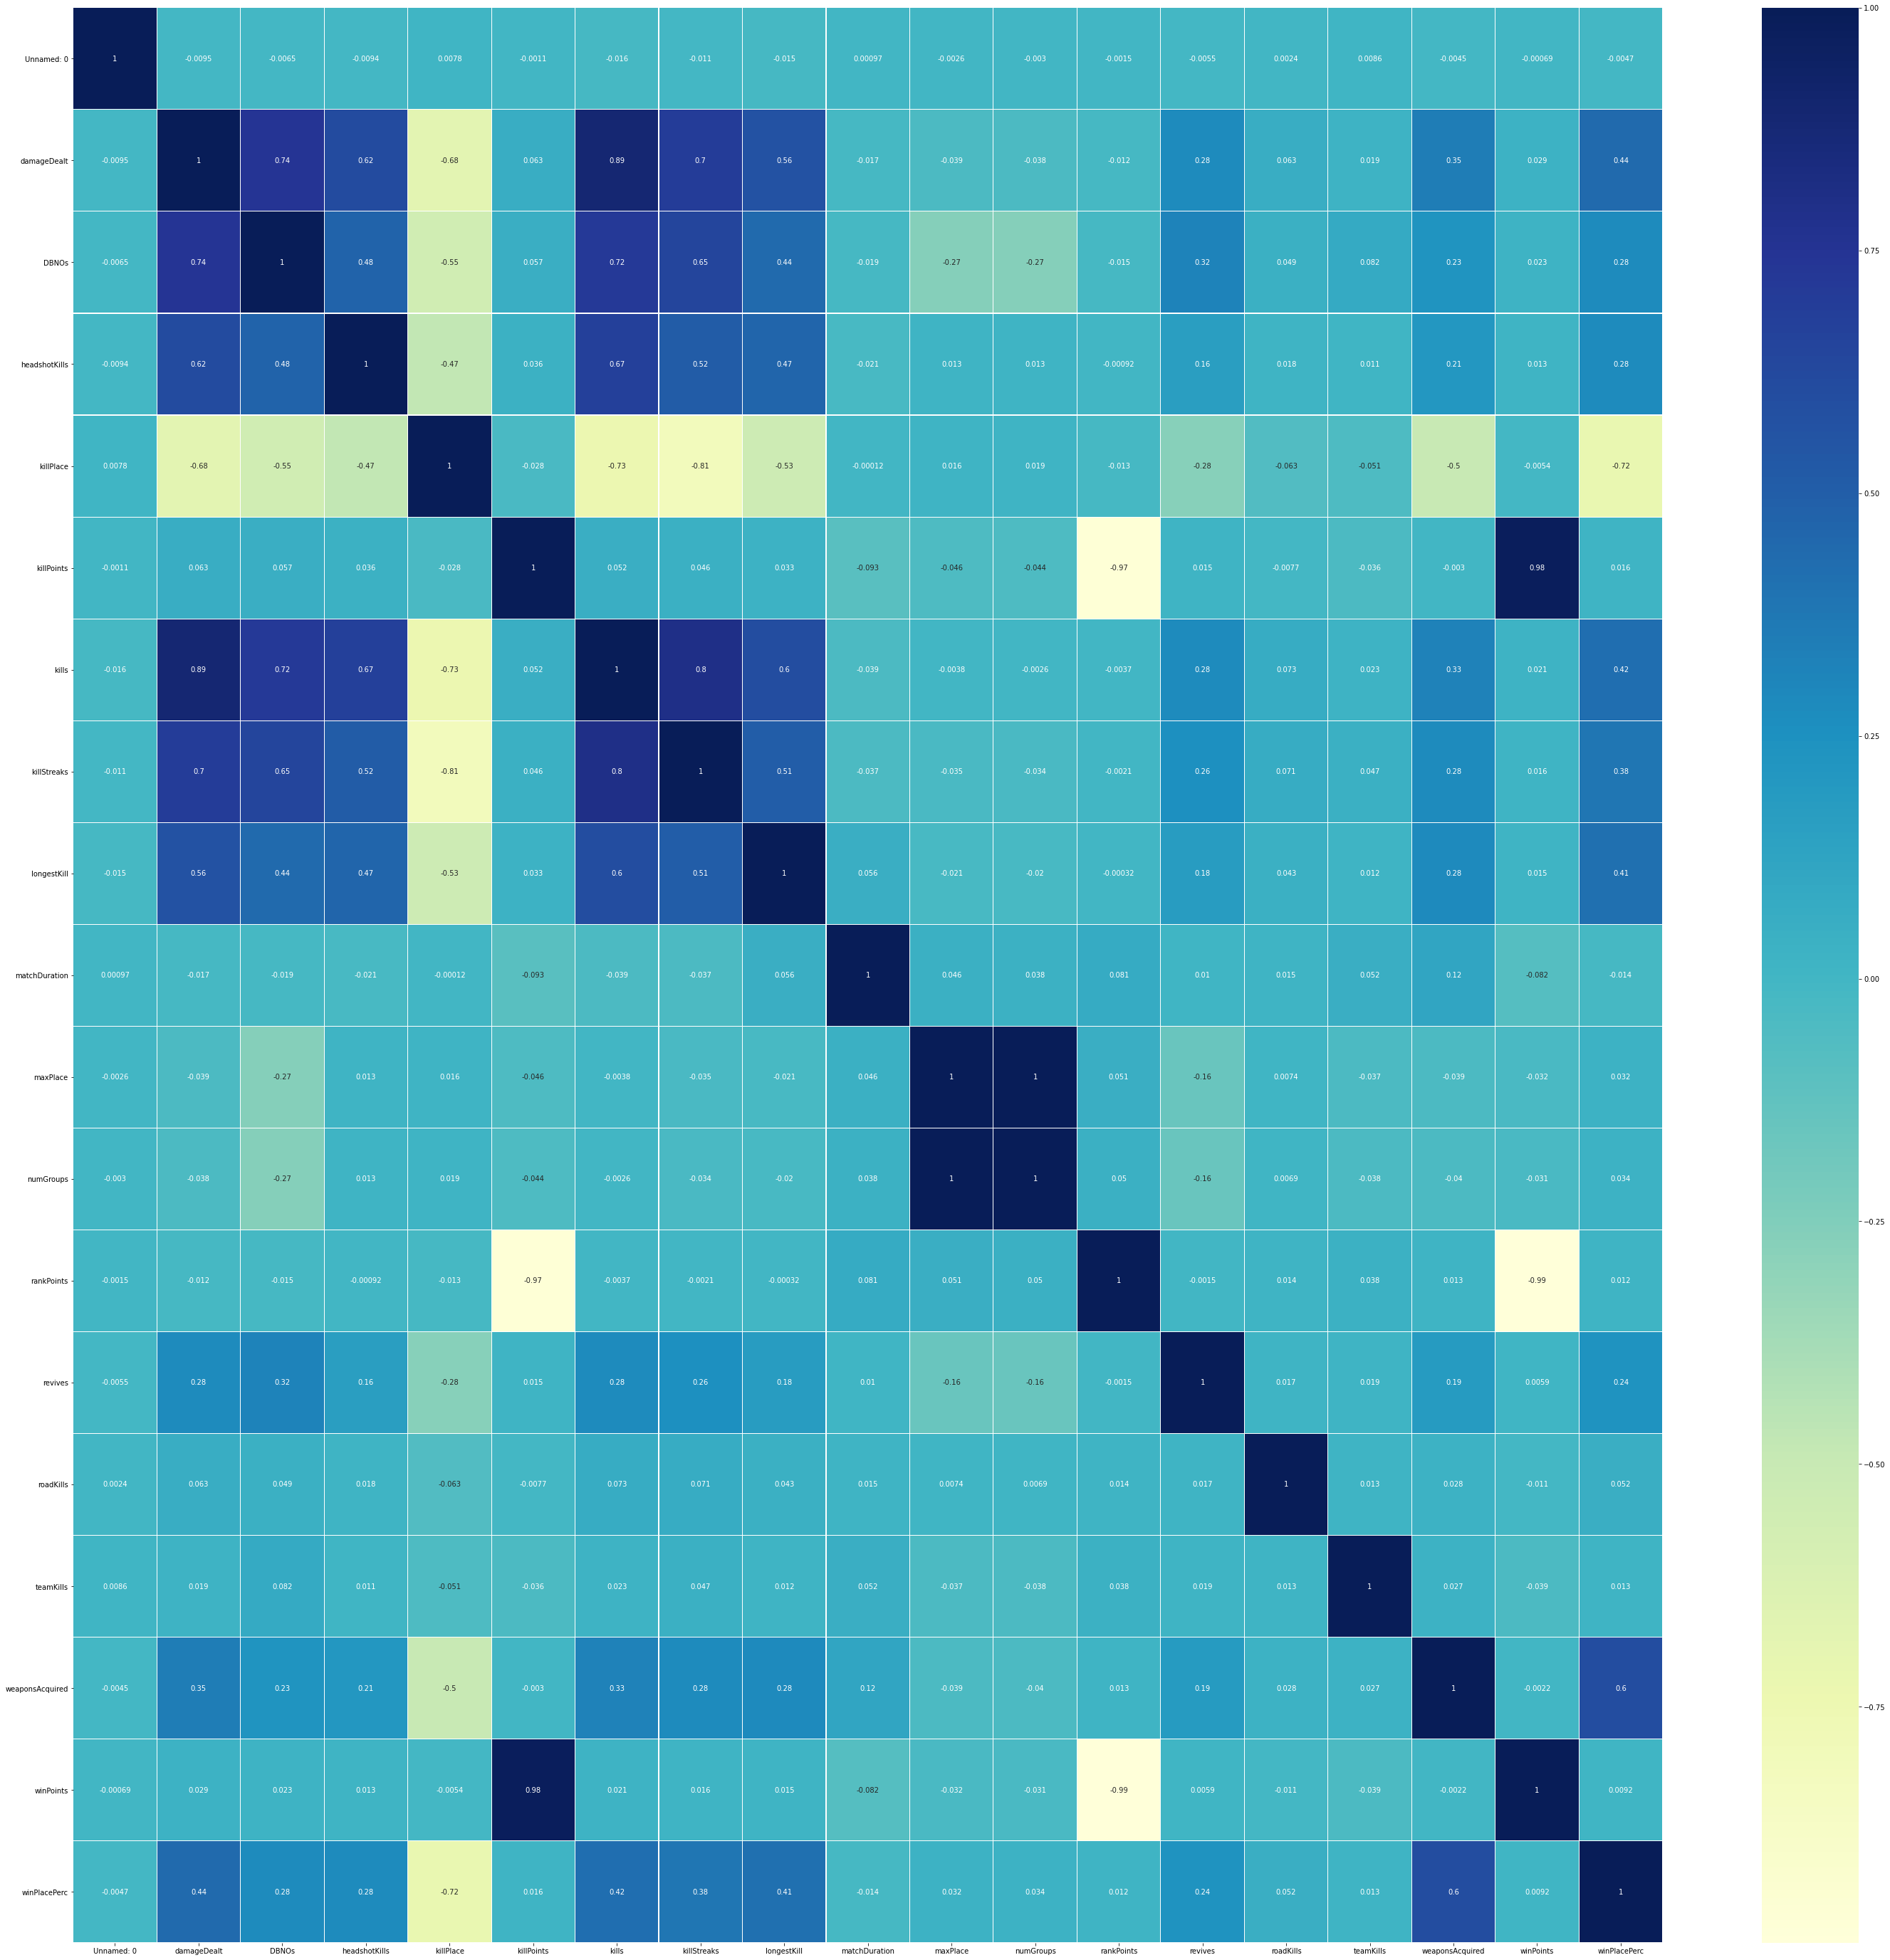

In [28]:
plt.figure(figsize=(50,50))

sns.heatmap(pubg.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

## Outliers Check


Outliers are the values which are significantly different from other values/observations. An outlier can create major issues in modelling. So it is necessary to find outliers and treat them.

Outliers can be detected by using boxplot. Boxplot depicts the variable distribution using quartile. It is also known as a box and whiskers plot.

In [39]:
# define plot function, and in this function, we will calculate the skew of X and take the log1p of y
def plot_outlier(x,y):
    tmp=x.dropna()
    skew_value=skew(tmp)
    y=np.log1p(y)
    print('sample lengh: %s   and skew: %s'%(len(x),skew_value))
    fig,axs=plt.subplots(1,2,figsize=(8,3))
    sns.boxplot(x,orient='v',ax=axs[0])
    sns.regplot(x,y,ax=axs[1])
    plt.tight_layout()

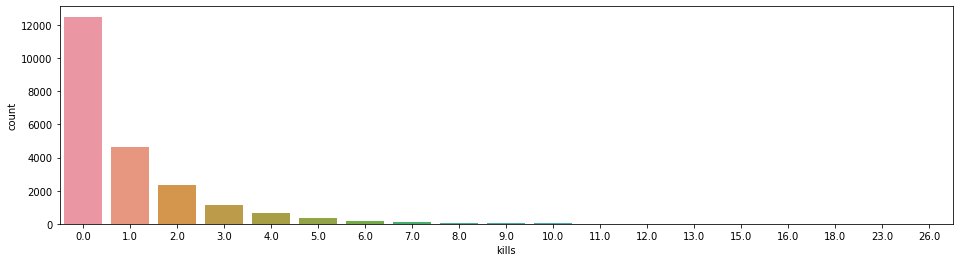

In [37]:
plt.figure(figsize=(16,4))
sns.countplot(x='kills', data=pubg_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



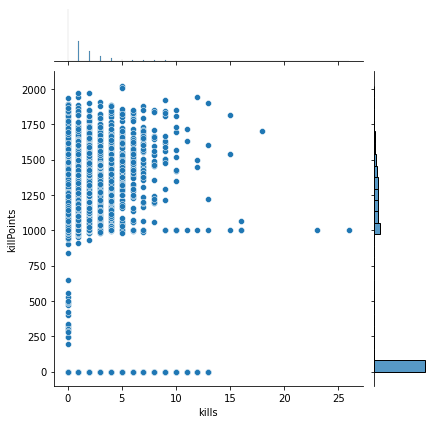

In [36]:
sns.jointplot(pubg_data['kills'], pubg_data['killPoints'])

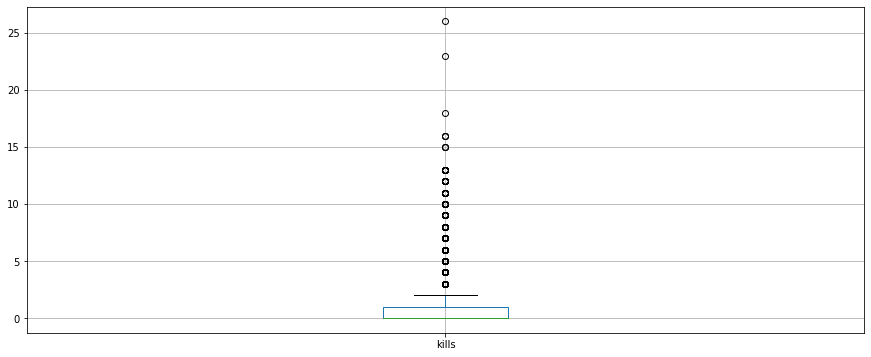

In [34]:
pubg_data.boxplot(column=["kills"])
plt.show()

It has outliers be

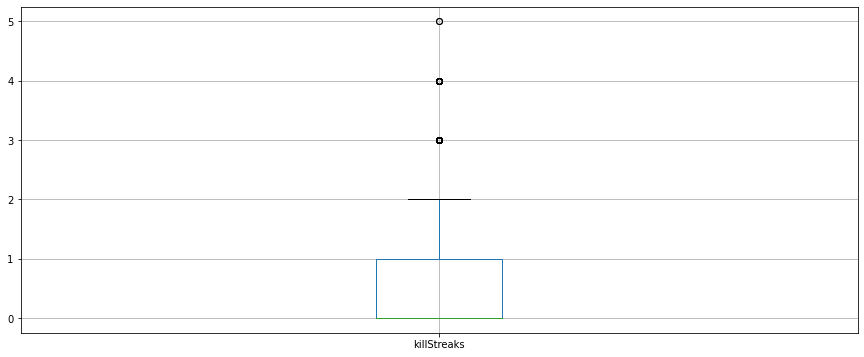

In [33]:
pubg_data.boxplot(column=["killStreaks"])
plt.show()

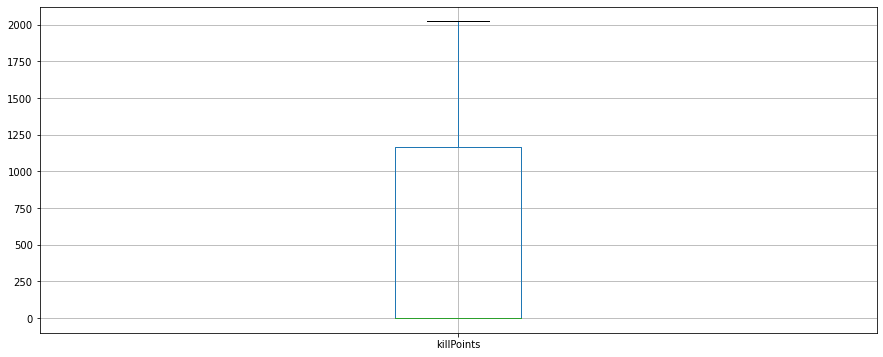

In [32]:
pubg.boxplot(column=["killPoints"])
plt.show()

## Multivariate analysis ##

**Pairplot**

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

In [43]:
#categorical features
categorical = pubg.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= pubg.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 2
Numerical Features in Train Set: 19


Column Variance

Return unbiased variance over requested axis.Normalized by N-1 by default. This can be changed using the ddof argument

In [45]:
pubg.var()

Unnamed: 0         1.653266e+12
damageDealt        2.918872e+04
DBNOs              1.337395e+00
headshotKills      3.626422e-01
killPlace          7.600422e+02
killPoints         3.943764e+05
kills              2.426586e+00
killStreaks        5.080981e-01
longestKill        2.701113e+03
matchDuration      6.733350e+04
maxPlace           5.666074e+02
numGroups          5.410628e+02
rankPoints         5.410668e+05
revives            2.199692e-01
roadKills          4.290611e-03
teamKills          2.981619e-02
weaponsAcquired    5.829273e+00
winPoints          5.439572e+05
winPlacePerc       9.429947e-02
dtype: float64

In [83]:
pubg.columns

Index(['Unnamed: 0', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc'],
      dtype='object')

## PIVOT_TABLE
This will resemble pivot tables to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the pivot_table method takes the following parameters:

values - a list of variables to calculate statistics for,

index – a list of variables to group data by,

aggfunc — what statistics we need to calculate for groups - e.g sum, mean, maximum, minimum or something else.



In [ ]:
pd.pivot_table(pubg, index=['winPoints', 'winPlacePerc'], columns = ['killPoints'], aggfunc=len)

Coorelation between kills and Winper

In [ ]:
column_1 = pubg["kills"]
column_2 = df["winPlacePerc"]
correlation = column_1.corr(column_2)

## Conclusion:

In [ ]:
1.From the data it is observed that maximum kills are 26.
2.There are missing values in the given data set,since the number is less i have droped the value rather than following imputation methods.
3.
